In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("cleaned_data.csv")

In [3]:
df

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,0.0568,...,1.0000,0.0000,0.0625,2,1,0,0,0,0,444
1,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,0.0754,...,0.9091,0.7692,0.2222,0,1,0,0,1,0,625
2,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,0.0374,...,1.0000,1.4286,0.0578,2,1,0,0,1,0,469
3,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,0.0850,...,1.0000,1.2500,0.1282,2,1,0,0,1,0,559
4,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,0.0132,...,0.9091,0.1163,0.0568,2,1,1,1,1,1,473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,328892,1465066,5501471,4.4546,16.7273,3.7551,16701,10132,0.6067,0.0508,...,0.9091,0.2041,0.0543,2,1,1,1,1,1,418
996,81404,88805,680837,1.0909,8.3637,7.6667,5400,1936,0.3585,0.0663,...,0.9091,0.8333,0.1087,0,1,0,0,1,0,589
997,0,42428,30760,3.2379,8.1889,0.7250,0,0,0.8779,0.0047,...,1.0668,0.2500,0.3448,0,1,0,0,1,0,499
998,36011,8002,604181,0.2222,16.7777,75.5037,1993,1271,0.6377,0.0553,...,1.1111,5.0002,0.0662,0,1,1,0,1,0,507


## Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [5]:
scaled_df = scaler.fit_transform(df)

In [6]:
df = pd.DataFrame(scaled_df, columns=df.columns)

In [7]:
df

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,0.050248,0.000000,0.089184,0.000000,0.432425,0.004098,0.043671,0.023674,0.472739,0.215062,...,0.249944,0.000000,0.006247,1.0,1.0,0.0,0.0,0.0,0.0,0.288
1,0.116536,0.031316,0.052885,0.073353,0.110563,0.011820,0.134505,0.002781,0.018048,0.289972,...,0.181777,0.076844,0.022208,0.0,1.0,0.0,0.0,1.0,0.0,0.650
2,0.046696,0.007432,0.089613,0.043448,0.467560,0.084394,0.026748,0.021544,0.702353,0.136931,...,0.249944,0.142719,0.005777,1.0,1.0,0.0,0.0,1.0,0.0,0.338
3,0.121821,0.022160,0.105405,0.049655,0.210807,0.033294,0.158525,0.092339,0.507985,0.328635,...,0.249944,0.124876,0.012813,1.0,1.0,0.0,0.0,1.0,0.0,0.518
4,0.226510,0.402662,0.402024,0.485265,0.432425,0.006988,0.045729,0.008067,0.153832,0.039468,...,0.181777,0.011618,0.005677,1.0,1.0,1.0,1.0,1.0,1.0,0.346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.496745,0.503137,0.921732,0.276491,0.452082,0.012823,0.386106,0.253820,0.573278,0.190898,...,0.181777,0.020390,0.005427,1.0,1.0,1.0,1.0,1.0,1.0,0.236
996,0.122949,0.030498,0.114069,0.067711,0.226042,0.026180,0.124841,0.048499,0.338751,0.253323,...,0.181777,0.083248,0.010864,0.0,1.0,0.0,0.0,1.0,0.0,0.578
997,0.000000,0.014571,0.005154,0.200972,0.221318,0.002476,0.000000,0.000000,0.829538,0.005236,...,0.300037,0.024975,0.034462,0.0,1.0,0.0,0.0,1.0,0.0,0.398
998,0.054390,0.002748,0.101226,0.013792,0.453444,0.257831,0.046076,0.031840,0.602570,0.209021,...,0.333258,0.499525,0.006616,0.0,1.0,1.0,0.0,1.0,0.0,0.414


In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.shape, y.shape

((1000, 84), (1000,))

## SelectKBest with f_regression

In [9]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [11]:
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)


In [12]:
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': fs.scores_})

# Sort feature scores in descending order
sorted_scores = feature_scores.sort_values(by='Score', ascending=False)
sorted_scores

,Feature,Score
4,R_DEBT_INCOME,2020.906222
5,R_DEBT_SAVINGS,194.435074
15,R_EDUCATION_INCOME,99.470380
2,DEBT,84.468037
71,R_UTILITIES_DEBT,75.809618
...,...,...
24,T_FINES_12,0.100769
6,T_CLOTHING_12,0.099875
73,T_EXPENDITURE_6,0.084443
69,R_UTILITIES_INCOME,0.045738


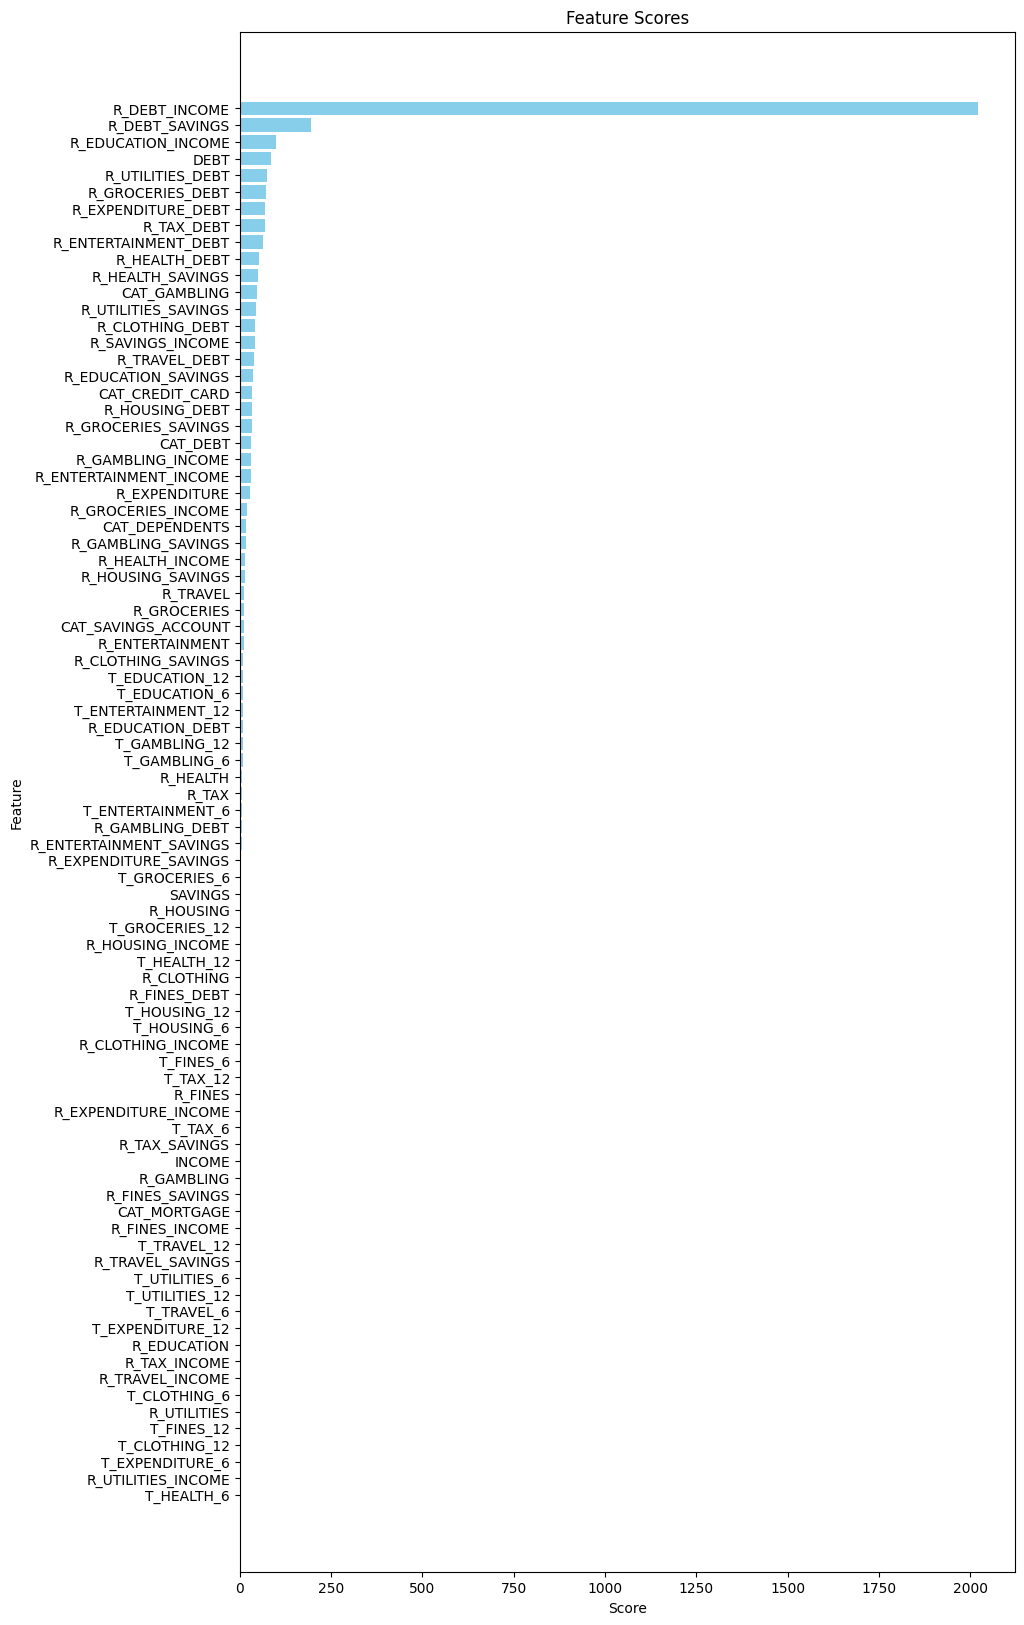

In [13]:
plt.figure(figsize=(10, 20))
plt.barh(sorted_scores['Feature'], sorted_scores['Score'], color='skyblue')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Scores')
plt.gca().invert_yaxis()  # Invert y-axis to show highest score on top
plt.show()

In [14]:
sorted_scores.set_index('Feature', inplace=True)

In [15]:
sorted_scores

,Score
Feature,
R_DEBT_INCOME,2020.906222
R_DEBT_SAVINGS,194.435074
R_EDUCATION_INCOME,99.470380
DEBT,84.468037
R_UTILITIES_DEBT,75.809618
...,...
T_FINES_12,0.100769
T_CLOTHING_12,0.099875
T_EXPENDITURE_6,0.084443


In [16]:
selected_features_f_reg = sorted_scores.loc[:"R_ENTERTAINMENT_SAVINGS"]

In [17]:
selected_features_f_reg

,Score
Feature,
R_DEBT_INCOME,2020.906222
R_DEBT_SAVINGS,194.435074
R_EDUCATION_INCOME,99.470380
DEBT,84.468037
R_UTILITIES_DEBT,75.809618
R_GROCERIES_DEBT,71.658764
R_EXPENDITURE_DEBT,70.361586
R_TAX_DEBT,68.218433
R_ENTERTAINMENT_DEBT,62.614899


In [18]:
len(selected_features_f_reg)

45

## SelectKBest with mutual_info_regression

In [65]:
from sklearn.feature_selection import mutual_info_regression
# configure to select all features
fs = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)


In [66]:
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': fs.scores_})

# Sort feature scores in descending order
sorted_scores = feature_scores.sort_values(by='Score', ascending=False)
sorted_scores

,Feature,Score
4,R_DEBT_INCOME,0.598866
77,R_EXPENDITURE_DEBT,0.388489
71,R_UTILITIES_DEBT,0.291949
23,R_ENTERTAINMENT_DEBT,0.279948
59,R_TAX_DEBT,0.277480
...,...,...
26,R_FINES,0.001325
10,R_CLOTHING_SAVINGS,0.000000
14,R_EDUCATION,0.000000
62,R_TRAVEL,0.000000


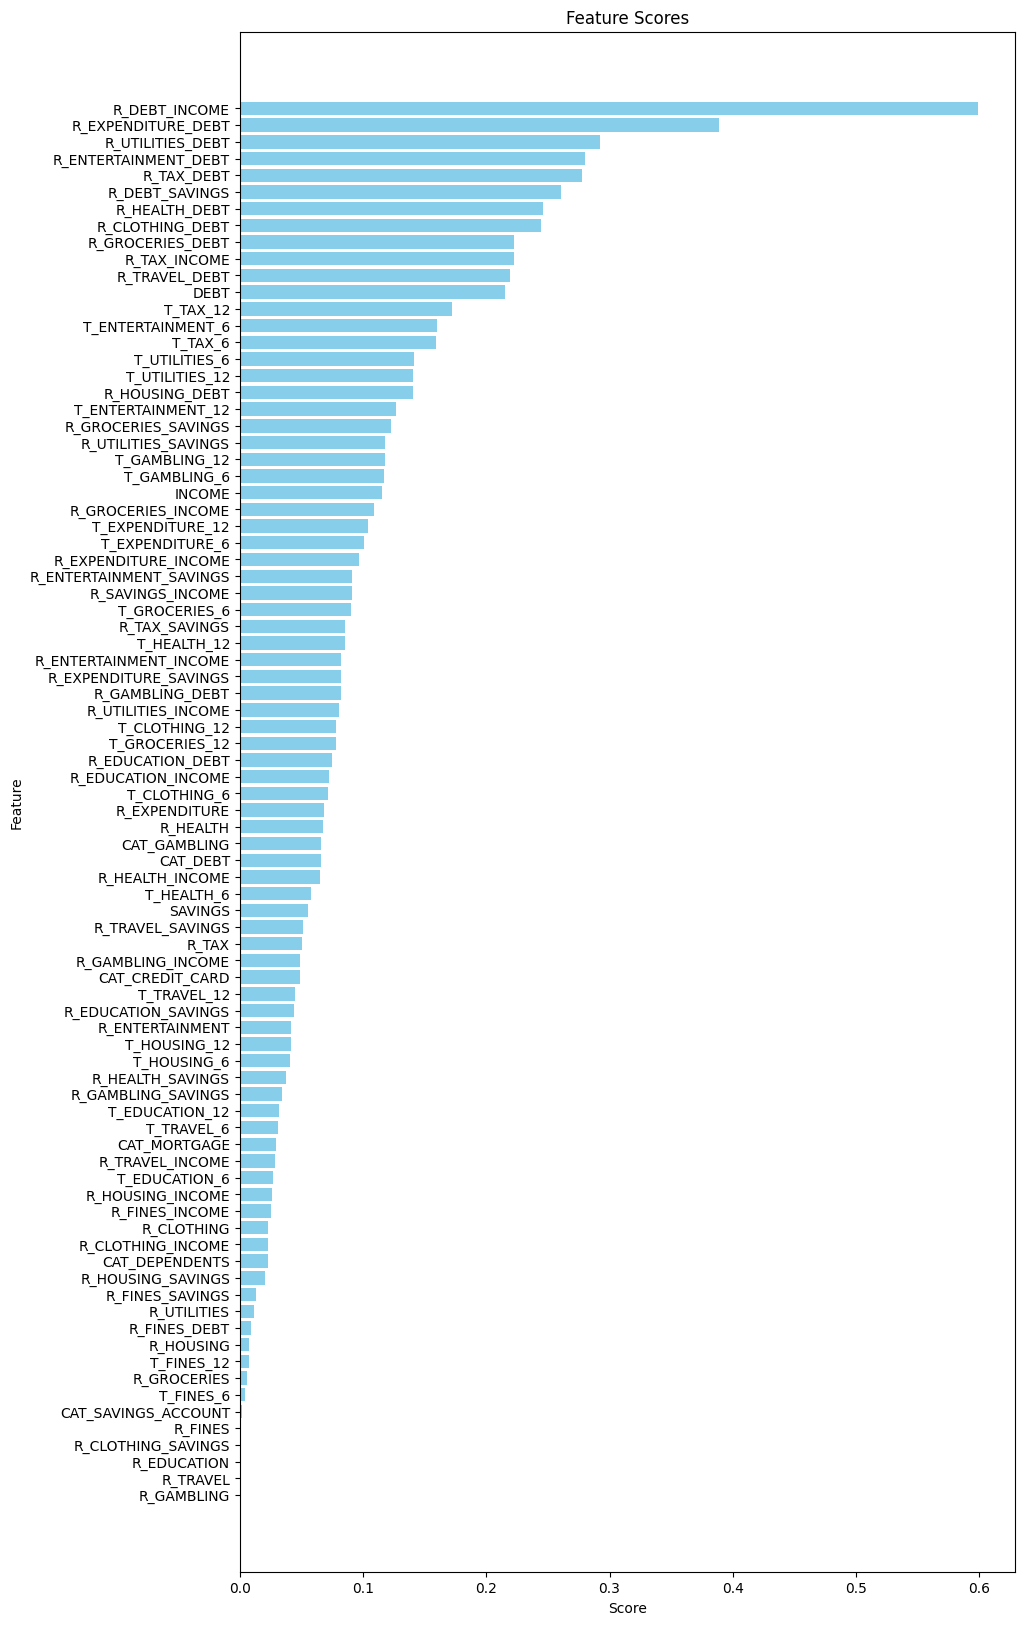

In [67]:
plt.figure(figsize=(10, 20))
plt.barh(sorted_scores['Feature'], sorted_scores['Score'], color='skyblue')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Scores')
plt.gca().invert_yaxis()  # Invert y-axis to show highest score on top
plt.show()

In [80]:
selected_features_mutual_info = sorted_scores[sorted_scores['Score']>0.1]["Feature"]
selected_features_mutual_info

4            R_DEBT_INCOME
77      R_EXPENDITURE_DEBT
71        R_UTILITIES_DEBT
23    R_ENTERTAINMENT_DEBT
59              R_TAX_DEBT
5           R_DEBT_SAVINGS
47           R_HEALTH_DEBT
11         R_CLOTHING_DEBT
41        R_GROCERIES_DEBT
57            R_TAX_INCOME
65           R_TRAVEL_DEBT
2                     DEBT
54                T_TAX_12
19       T_ENTERTAINMENT_6
55                 T_TAX_6
67           T_UTILITIES_6
66          T_UTILITIES_12
53          R_HOUSING_DEBT
18      T_ENTERTAINMENT_12
40     R_GROCERIES_SAVINGS
70     R_UTILITIES_SAVINGS
30           T_GAMBLING_12
31            T_GAMBLING_6
0                   INCOME
39      R_GROCERIES_INCOME
72        T_EXPENDITURE_12
73         T_EXPENDITURE_6
Name: Feature, dtype: object

## Lasso Regression

In [98]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.shape, y.shape

((1000, 84), (1000,))

In [99]:
len(X.columns)

84

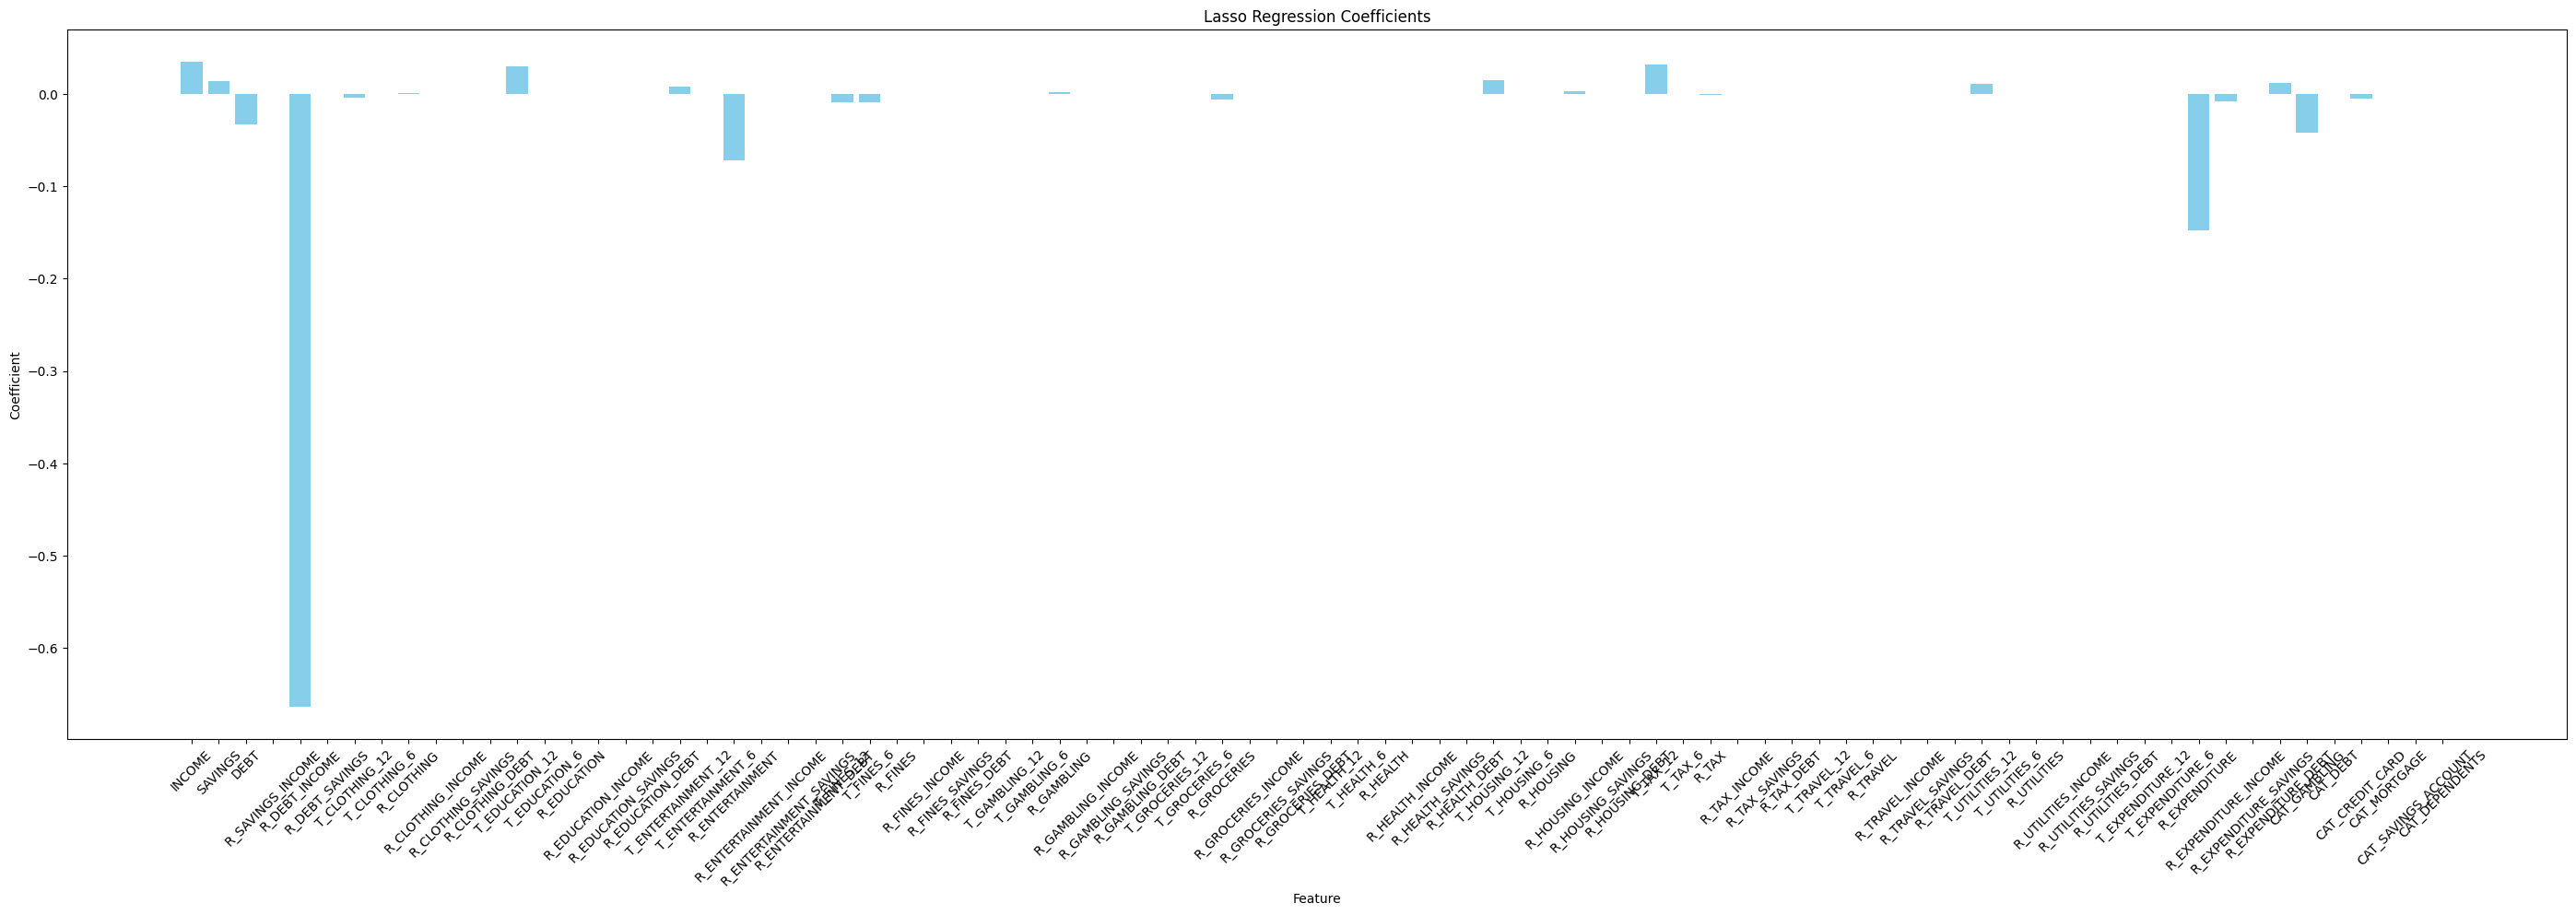

Selected Features:
Index(['INCOME', 'SAVINGS', 'DEBT', 'R_DEBT_INCOME', 'T_CLOTHING_12',
       'R_CLOTHING', 'T_EDUCATION_12', 'T_ENTERTAINMENT_12', 'R_ENTERTAINMENT',
       'T_FINES_12', 'T_FINES_6', 'R_GAMBLING', 'R_GROCERIES', 'T_HOUSING_12',
       'R_HOUSING_INCOME', 'T_TAX_12', 'R_TAX', 'T_UTILITIES_12',
       'R_EXPENDITURE', 'R_EXPENDITURE_INCOME', 'R_EXPENDITURE_DEBT',
       'CAT_GAMBLING', 'CAT_CREDIT_CARD'],
      dtype='object')


In [100]:
from sklearn.linear_model import LassoCV

# Fit LassoCV model
lasso_cv = LassoCV(cv=5)  # Use cross-validation to find the best regularization parameter
lasso_cv.fit(X, y)

# Extract selected features
selected_features_lasso = X.columns[lasso_cv.coef_ != 0]

# Plot feature coefficients
plt.figure(figsize=(35, 10))
plt.bar(X.columns, lasso_cv.coef_, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Lasso Regression Coefficients')
plt.xticks(rotation=45)
plt.show()

# Print selected features
print("Selected Features:")
print(selected_features_lasso)

In [101]:
len(selected_features_lasso)

23

## RandomForestRegressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Assuming X_train and y_train are your training features and target
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor()

# Fit the model
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 4 (0.710828)
2. feature 74 (0.041499)
3. feature 77 (0.020146)
4. feature 59 (0.013379)
5. feature 33 (0.010645)
6. feature 20 (0.008633)
7. feature 0 (0.008040)
8. feature 71 (0.007628)
9. feature 2 (0.007359)
10. feature 38 (0.007259)
11. feature 62 (0.006984)
12. feature 54 (0.006768)
13. feature 9 (0.005029)
14. feature 73 (0.004985)
15. feature 8 (0.004776)
16. feature 44 (0.004464)
17. feature 5 (0.004266)
18. feature 72 (0.004052)
19. feature 60 (0.003999)
20. feature 61 (0.003855)
21. feature 68 (0.003839)
22. feature 32 (0.003732)
23. feature 7 (0.003496)
24. feature 42 (0.003412)
25. feature 11 (0.003345)
26. feature 14 (0.003309)
27. feature 26 (0.003301)
28. feature 55 (0.003284)
29. feature 41 (0.003280)
30. feature 66 (0.003231)
31. feature 69 (0.003129)
32. feature 75 (0.003102)
33. feature 45 (0.003071)
34. feature 39 (0.003047)
35. feature 43 (0.002962)
36. feature 34 (0.002917)
37. feature 1 (0.002749)
38. feature 67 (0.002631)
39. feature 

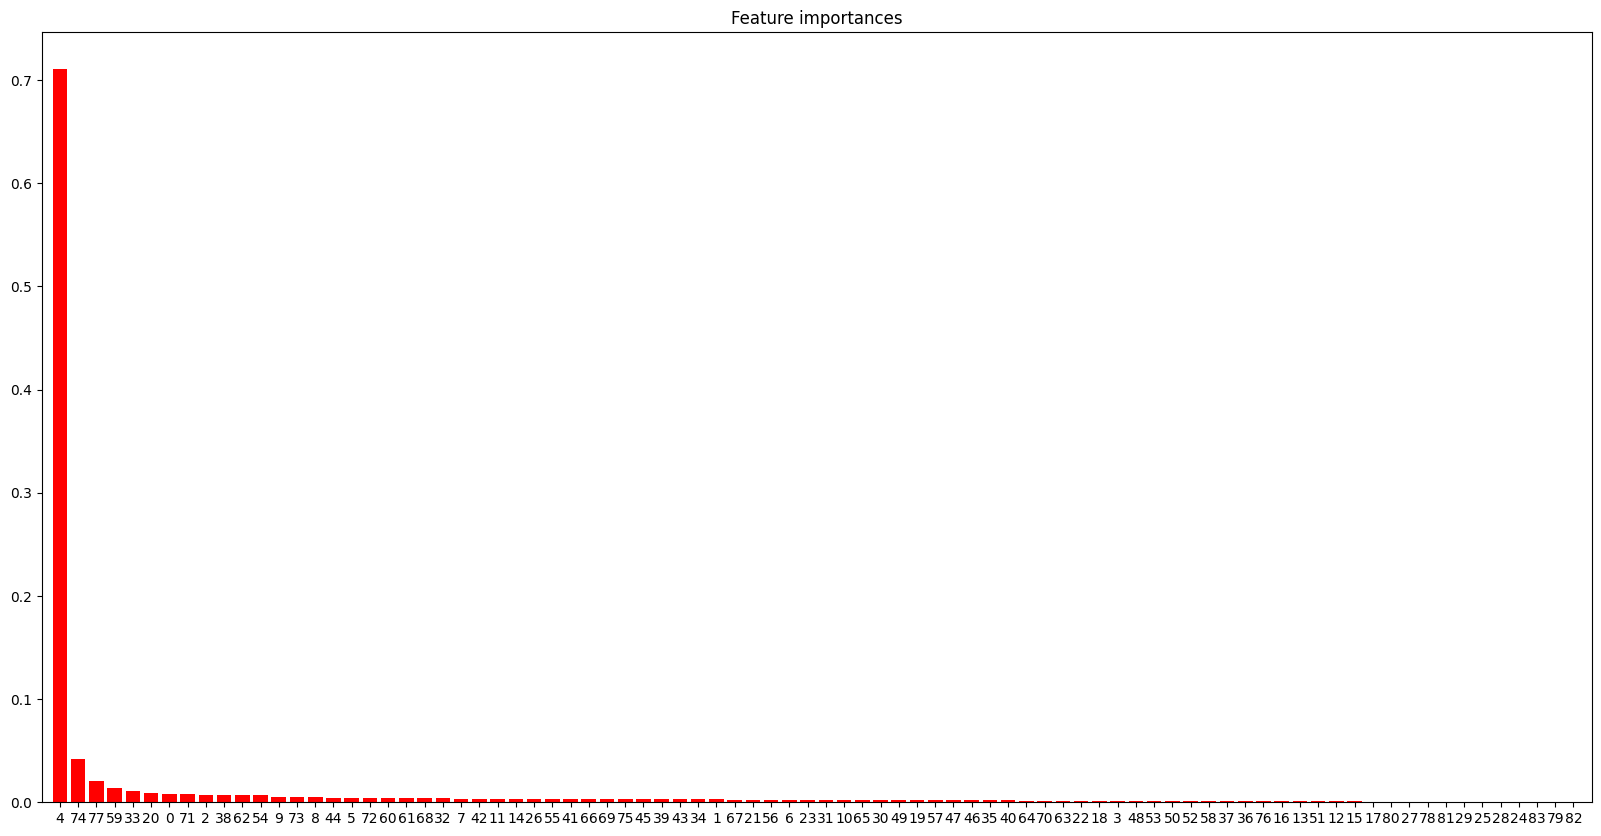

In [58]:
# Plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [59]:
# printing in order of importance 
X.columns[indices-1]

Index(['R_SAVINGS_INCOME', 'T_EXPENDITURE_6', 'R_EXPENDITURE_SAVINGS',
       'R_TAX_SAVINGS', 'R_GAMBLING', 'T_ENTERTAINMENT_6', 'CAT_DEPENDENTS',
       'R_UTILITIES_SAVINGS', 'SAVINGS', 'T_GROCERIES_6', 'T_TRAVEL_6',
       'R_HOUSING_DEBT', 'R_CLOTHING', 'T_EXPENDITURE_12', 'T_CLOTHING_6',
       'T_HEALTH_6', 'R_DEBT_INCOME', 'R_UTILITIES_DEBT', 'R_TAX_DEBT',
       'T_TRAVEL_12', 'T_UTILITIES_6', 'T_GAMBLING_6', 'T_CLOTHING_12',
       'R_GROCERIES_DEBT', 'R_CLOTHING_SAVINGS', 'T_EDUCATION_6', 'T_FINES_6',
       'T_TAX_12', 'R_GROCERIES_SAVINGS', 'R_TRAVEL_DEBT', 'R_UTILITIES',
       'R_EXPENDITURE', 'R_HEALTH', 'R_GROCERIES', 'T_HEALTH_12',
       'R_GAMBLING_INCOME', 'INCOME', 'T_UTILITIES_12', 'R_ENTERTAINMENT',
       'T_TAX_6', 'R_DEBT_SAVINGS', 'R_ENTERTAINMENT_SAVINGS', 'T_GAMBLING_12',
       'R_CLOTHING_INCOME', 'R_TRAVEL_SAVINGS', 'R_FINES_DEBT', 'T_HOUSING_12',
       'T_ENTERTAINMENT_12', 'R_TAX', 'R_HEALTH_SAVINGS', 'R_HEALTH_INCOME',
       'R_GAMBLING_SAVINGS', '

In [61]:
# indices of important columns
indexes = []
i = 0
while indices[i]!=15:
    i += 1
    indexes.append(indices[i])
print(indexes)  

[74, 77, 59, 33, 20, 0, 71, 2, 38, 62, 54, 9, 73, 8, 44, 5, 72, 60, 61, 68, 32, 7, 42, 11, 14, 26, 55, 41, 66, 69, 75, 45, 39, 43, 34, 1, 67, 21, 56, 6, 23, 31, 10, 65, 30, 49, 19, 57, 47, 46, 35, 40, 64, 70, 63, 22, 18, 3, 48, 53, 50, 52, 58, 37, 36, 76, 16, 13, 51, 12, 15]


In [62]:
len(indexes)

71

In [64]:
rfr_columns = X.columns[indexes]
rfr_columns

Index(['R_EXPENDITURE', 'R_EXPENDITURE_DEBT', 'R_TAX_DEBT',
       'R_GAMBLING_INCOME', 'R_ENTERTAINMENT', 'INCOME', 'R_UTILITIES_DEBT',
       'DEBT', 'R_GROCERIES', 'R_TRAVEL', 'T_TAX_12', 'R_CLOTHING_INCOME',
       'T_EXPENDITURE_6', 'R_CLOTHING', 'R_HEALTH', 'R_DEBT_SAVINGS',
       'T_EXPENDITURE_12', 'T_TRAVEL_12', 'T_TRAVEL_6', 'R_UTILITIES',
       'R_GAMBLING', 'T_CLOTHING_6', 'T_HEALTH_12', 'R_CLOTHING_DEBT',
       'R_EDUCATION', 'R_FINES', 'T_TAX_6', 'R_GROCERIES_DEBT',
       'T_UTILITIES_12', 'R_UTILITIES_INCOME', 'R_EXPENDITURE_INCOME',
       'R_HEALTH_INCOME', 'R_GROCERIES_INCOME', 'T_HEALTH_6',
       'R_GAMBLING_SAVINGS', 'SAVINGS', 'T_UTILITIES_6',
       'R_ENTERTAINMENT_INCOME', 'R_TAX', 'T_CLOTHING_12',
       'R_ENTERTAINMENT_DEBT', 'T_GAMBLING_6', 'R_CLOTHING_SAVINGS',
       'R_TRAVEL_DEBT', 'T_GAMBLING_12', 'T_HOUSING_6', 'T_ENTERTAINMENT_6',
       'R_TAX_INCOME', 'R_HEALTH_DEBT', 'R_HEALTH_SAVINGS', 'R_GAMBLING_DEBT',
       'R_GROCERIES_SAVINGS', 'R_TRAVE

## GradientBoostingRegressor

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Assuming X_train and y_train are your training features and target
# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()

# Fit the model
gb_model.fit(X_train, y_train)

# Get feature importances
importances = gb_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



Feature ranking:
1. feature 4 (0.745129)
2. feature 74 (0.049132)
3. feature 59 (0.018963)
4. feature 77 (0.017316)
5. feature 33 (0.015310)
6. feature 20 (0.011810)
7. feature 2 (0.011279)
8. feature 0 (0.008947)
9. feature 30 (0.007117)
10. feature 67 (0.006434)
11. feature 54 (0.005929)
12. feature 57 (0.005799)
13. feature 6 (0.004917)
14. feature 41 (0.004858)
15. feature 62 (0.004529)
16. feature 9 (0.004263)
17. feature 1 (0.004027)
18. feature 75 (0.003978)
19. feature 60 (0.003916)
20. feature 5 (0.003807)
21. feature 72 (0.003788)
22. feature 73 (0.003148)
23. feature 42 (0.003067)
24. feature 48 (0.002987)
25. feature 38 (0.002868)
26. feature 65 (0.002687)
27. feature 7 (0.002243)
28. feature 71 (0.002142)
29. feature 39 (0.002040)
30. feature 43 (0.001949)
31. feature 66 (0.001923)
32. feature 47 (0.001872)
33. feature 31 (0.001815)
34. feature 37 (0.001765)
35. feature 45 (0.001726)
36. feature 18 (0.001675)
37. feature 78 (0.001627)
38. feature 70 (0.001480)
39. feature 

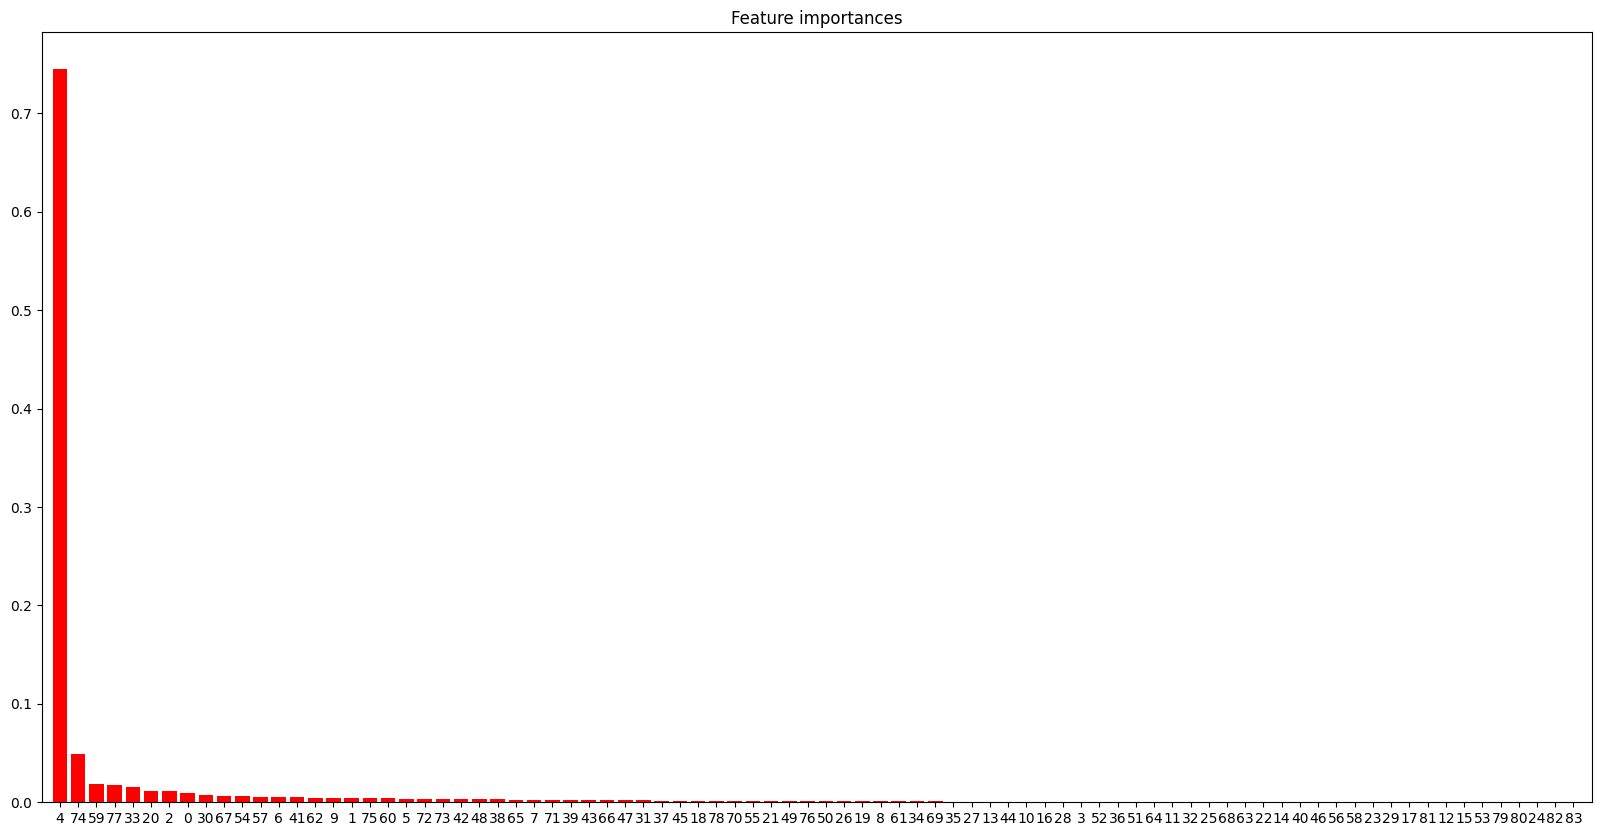

In [42]:
# Plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [43]:
# printing in order of importance
X.columns[indices-1]

Index(['R_SAVINGS_INCOME', 'T_EXPENDITURE_6', 'R_TAX_SAVINGS',
       'R_EXPENDITURE_SAVINGS', 'R_GAMBLING', 'T_ENTERTAINMENT_6', 'SAVINGS',
       'CAT_DEPENDENTS', 'R_FINES_DEBT', 'T_UTILITIES_12', 'R_HOUSING_DEBT',
       'R_TAX', 'R_DEBT_SAVINGS', 'R_GROCERIES_SAVINGS', 'T_TRAVEL_6',
       'R_CLOTHING', 'INCOME', 'R_EXPENDITURE', 'R_TAX_DEBT', 'R_DEBT_INCOME',
       'R_UTILITIES_DEBT', 'T_EXPENDITURE_12', 'R_GROCERIES_DEBT',
       'R_HEALTH_DEBT', 'T_GROCERIES_6', 'R_TRAVEL_SAVINGS', 'T_CLOTHING_12',
       'R_UTILITIES_SAVINGS', 'R_GROCERIES', 'T_HEALTH_12', 'R_TRAVEL_DEBT',
       'R_HEALTH_SAVINGS', 'T_GAMBLING_12', 'T_GROCERIES_12', 'R_HEALTH',
       'R_EDUCATION_DEBT', 'R_EXPENDITURE_DEBT', 'R_UTILITIES_INCOME',
       'T_TAX_12', 'R_ENTERTAINMENT', 'T_HOUSING_12', 'R_EXPENDITURE_INCOME',
       'T_HOUSING_6', 'T_FINES_6', 'T_ENTERTAINMENT_12', 'T_CLOTHING_6',
       'T_TRAVEL_12', 'R_GAMBLING_INCOME', 'R_UTILITIES', 'R_GAMBLING_SAVINGS',
       'R_FINES', 'T_EDUCATION_12'

In [54]:
# indices of important columns
indexes = []
i = 0
while indices[i]!=69:
    i += 1
    indexes.append(indices[i])
print(indexes)    

[74, 59, 77, 33, 20, 2, 0, 30, 67, 54, 57, 6, 41, 62, 9, 1, 75, 60, 5, 72, 73, 42, 48, 38, 65, 7, 71, 39, 43, 66, 47, 31, 37, 45, 18, 78, 70, 55, 21, 49, 76, 50, 26, 19, 8, 61, 34, 69]


In [55]:
gbr_columns = X.columns[indexes]
gbr_columns

Index(['R_EXPENDITURE', 'R_TAX_DEBT', 'R_EXPENDITURE_DEBT',
       'R_GAMBLING_INCOME', 'R_ENTERTAINMENT', 'DEBT', 'INCOME',
       'T_GAMBLING_12', 'T_UTILITIES_6', 'T_TAX_12', 'R_TAX_INCOME',
       'T_CLOTHING_12', 'R_GROCERIES_DEBT', 'R_TRAVEL', 'R_CLOTHING_INCOME',
       'SAVINGS', 'R_EXPENDITURE_INCOME', 'T_TRAVEL_12', 'R_DEBT_SAVINGS',
       'T_EXPENDITURE_12', 'T_EXPENDITURE_6', 'T_HEALTH_12', 'T_HOUSING_12',
       'R_GROCERIES', 'R_TRAVEL_DEBT', 'T_CLOTHING_6', 'R_UTILITIES_DEBT',
       'R_GROCERIES_INCOME', 'T_HEALTH_6', 'T_UTILITIES_12', 'R_HEALTH_DEBT',
       'T_GAMBLING_6', 'T_GROCERIES_6', 'R_HEALTH_INCOME',
       'T_ENTERTAINMENT_12', 'CAT_GAMBLING', 'R_UTILITIES_SAVINGS', 'T_TAX_6',
       'R_ENTERTAINMENT_INCOME', 'T_HOUSING_6', 'R_EXPENDITURE_SAVINGS',
       'R_HOUSING', 'R_FINES', 'T_ENTERTAINMENT_6', 'R_CLOTHING', 'T_TRAVEL_6',
       'R_GAMBLING_SAVINGS', 'R_UTILITIES_INCOME'],
      dtype='object')

## Intersections

In [81]:
'''
1) gbr_columns
2) rfr_columns
3)selected_features_f_reg 
4)selected_features_lasso
5)selected_features_mutual_info
'''
gbr_columns

Index(['R_EXPENDITURE', 'R_TAX_DEBT', 'R_EXPENDITURE_DEBT',
       'R_GAMBLING_INCOME', 'R_ENTERTAINMENT', 'DEBT', 'INCOME',
       'T_GAMBLING_12', 'T_UTILITIES_6', 'T_TAX_12', 'R_TAX_INCOME',
       'T_CLOTHING_12', 'R_GROCERIES_DEBT', 'R_TRAVEL', 'R_CLOTHING_INCOME',
       'SAVINGS', 'R_EXPENDITURE_INCOME', 'T_TRAVEL_12', 'R_DEBT_SAVINGS',
       'T_EXPENDITURE_12', 'T_EXPENDITURE_6', 'T_HEALTH_12', 'T_HOUSING_12',
       'R_GROCERIES', 'R_TRAVEL_DEBT', 'T_CLOTHING_6', 'R_UTILITIES_DEBT',
       'R_GROCERIES_INCOME', 'T_HEALTH_6', 'T_UTILITIES_12', 'R_HEALTH_DEBT',
       'T_GAMBLING_6', 'T_GROCERIES_6', 'R_HEALTH_INCOME',
       'T_ENTERTAINMENT_12', 'CAT_GAMBLING', 'R_UTILITIES_SAVINGS', 'T_TAX_6',
       'R_ENTERTAINMENT_INCOME', 'T_HOUSING_6', 'R_EXPENDITURE_SAVINGS',
       'R_HOUSING', 'R_FINES', 'T_ENTERTAINMENT_6', 'R_CLOTHING', 'T_TRAVEL_6',
       'R_GAMBLING_SAVINGS', 'R_UTILITIES_INCOME'],
      dtype='object')

In [82]:
rfr_columns

Index(['R_EXPENDITURE', 'R_EXPENDITURE_DEBT', 'R_TAX_DEBT',
       'R_GAMBLING_INCOME', 'R_ENTERTAINMENT', 'INCOME', 'R_UTILITIES_DEBT',
       'DEBT', 'R_GROCERIES', 'R_TRAVEL', 'T_TAX_12', 'R_CLOTHING_INCOME',
       'T_EXPENDITURE_6', 'R_CLOTHING', 'R_HEALTH', 'R_DEBT_SAVINGS',
       'T_EXPENDITURE_12', 'T_TRAVEL_12', 'T_TRAVEL_6', 'R_UTILITIES',
       'R_GAMBLING', 'T_CLOTHING_6', 'T_HEALTH_12', 'R_CLOTHING_DEBT',
       'R_EDUCATION', 'R_FINES', 'T_TAX_6', 'R_GROCERIES_DEBT',
       'T_UTILITIES_12', 'R_UTILITIES_INCOME', 'R_EXPENDITURE_INCOME',
       'R_HEALTH_INCOME', 'R_GROCERIES_INCOME', 'T_HEALTH_6',
       'R_GAMBLING_SAVINGS', 'SAVINGS', 'T_UTILITIES_6',
       'R_ENTERTAINMENT_INCOME', 'R_TAX', 'T_CLOTHING_12',
       'R_ENTERTAINMENT_DEBT', 'T_GAMBLING_6', 'R_CLOTHING_SAVINGS',
       'R_TRAVEL_DEBT', 'T_GAMBLING_12', 'T_HOUSING_6', 'T_ENTERTAINMENT_6',
       'R_TAX_INCOME', 'R_HEALTH_DEBT', 'R_HEALTH_SAVINGS', 'R_GAMBLING_DEBT',
       'R_GROCERIES_SAVINGS', 'R_TRAVE

In [103]:
f_reg_columns = selected_features_f_reg.T.columns
f_reg_columns

Index(['R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'R_EDUCATION_INCOME', 'DEBT',
       'R_UTILITIES_DEBT', 'R_GROCERIES_DEBT', 'R_EXPENDITURE_DEBT',
       'R_TAX_DEBT', 'R_ENTERTAINMENT_DEBT', 'R_HEALTH_DEBT',
       'R_HEALTH_SAVINGS', 'CAT_GAMBLING', 'R_UTILITIES_SAVINGS',
       'R_CLOTHING_DEBT', 'R_SAVINGS_INCOME', 'R_TRAVEL_DEBT',
       'R_EDUCATION_SAVINGS', 'CAT_CREDIT_CARD', 'R_HOUSING_DEBT',
       'R_GROCERIES_SAVINGS', 'CAT_DEBT', 'R_GAMBLING_INCOME',
       'R_ENTERTAINMENT_INCOME', 'R_EXPENDITURE', 'R_GROCERIES_INCOME',
       'CAT_DEPENDENTS', 'R_GAMBLING_SAVINGS', 'R_HEALTH_INCOME',
       'R_HOUSING_SAVINGS', 'R_TRAVEL', 'R_GROCERIES', 'CAT_SAVINGS_ACCOUNT',
       'R_ENTERTAINMENT', 'R_CLOTHING_SAVINGS', 'T_EDUCATION_12',
       'T_EDUCATION_6', 'T_ENTERTAINMENT_12', 'R_EDUCATION_DEBT',
       'T_GAMBLING_12', 'T_GAMBLING_6', 'R_HEALTH', 'R_TAX',
       'T_ENTERTAINMENT_6', 'R_GAMBLING_DEBT', 'R_ENTERTAINMENT_SAVINGS'],
      dtype='object', name='Feature')

In [102]:
selected_features_lasso

Index(['INCOME', 'SAVINGS', 'DEBT', 'R_DEBT_INCOME', 'T_CLOTHING_12',
       'R_CLOTHING', 'T_EDUCATION_12', 'T_ENTERTAINMENT_12', 'R_ENTERTAINMENT',
       'T_FINES_12', 'T_FINES_6', 'R_GAMBLING', 'R_GROCERIES', 'T_HOUSING_12',
       'R_HOUSING_INCOME', 'T_TAX_12', 'R_TAX', 'T_UTILITIES_12',
       'R_EXPENDITURE', 'R_EXPENDITURE_INCOME', 'R_EXPENDITURE_DEBT',
       'CAT_GAMBLING', 'CAT_CREDIT_CARD'],
      dtype='object')

In [104]:
mutual_info_columns = selected_features_mutual_info.values
mutual_info_columns

array(['R_DEBT_INCOME', 'R_EXPENDITURE_DEBT', 'R_UTILITIES_DEBT',
       'R_ENTERTAINMENT_DEBT', 'R_TAX_DEBT', 'R_DEBT_SAVINGS',
       'R_HEALTH_DEBT', 'R_CLOTHING_DEBT', 'R_GROCERIES_DEBT',
       'R_TAX_INCOME', 'R_TRAVEL_DEBT', 'DEBT', 'T_TAX_12',
       'T_ENTERTAINMENT_6', 'T_TAX_6', 'T_UTILITIES_6', 'T_UTILITIES_12',
       'R_HOUSING_DEBT', 'T_ENTERTAINMENT_12', 'R_GROCERIES_SAVINGS',
       'R_UTILITIES_SAVINGS', 'T_GAMBLING_12', 'T_GAMBLING_6', 'INCOME',
       'R_GROCERIES_INCOME', 'T_EXPENDITURE_12', 'T_EXPENDITURE_6'],
      dtype=object)

In [106]:
intersection = np.intersect1d(gbr_columns, rfr_columns)
intersection = np.intersect1d(intersection, f_reg_columns)
intersection = np.intersect1d(intersection, selected_features_lasso)
intersection = np.intersect1d(intersection, mutual_info_columns)

print("Intersection of arrays:", intersection)

Intersection of arrays: ['DEBT' 'R_EXPENDITURE_DEBT' 'T_ENTERTAINMENT_12']
